# Muthoot Finance

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from tqdm.auto import tqdm
tqdm.pandas()
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/nbfc/muthoot_finance/muthoot_finance.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(8198, 27)

## Data Cleaning

In [4]:
# Declare the list of words for share market tweets
stock_words_list = ['stock', 'stocks', 'share market', 'share', 'market', 'results', 
                    'raising', 'raised', 'raise', 'raises', 'ipo', 'breakout', 'trading', 'trade', 'stop loss', 'stoploss', 'hold', 
                    'holding', 'ncd', 'vcp', 'chart', 'watchlist']

In [5]:
# Remove tweets related to stock market
df['is_share_tweet'] = df['tweet'].apply(lambda x: any(word in str(x).lower() for word in stock_words_list))
cleaned_df = df[~df['is_share_tweet']]

In [6]:
cleaned_df.shape

(5278, 28)

## Word Distribution

In [8]:
words = ["harassment", "fraud", "restructure", "covid19 relief", "force", "money cut", "unethical", "fake", "false promise", "shutdown",
         "moratorium", "no response", "scam", "no answer", "love", "responsive", "very bad", "machine learning", "algorithm", "delay", 
         "leveraging"]

In [9]:
processor = Processor('./../../data/config.json')

In [10]:
pre_df = cleaned_df[cleaned_df['date'] < '2020-02-01']
post_df = cleaned_df[cleaned_df['date'] >= '2020-02-01']

In [11]:
pre_result = processor.words_distribution(pre_df, words)

100%|██████████| 21/21 [01:16<00:00,  3.64s/it]


In [12]:
pre_result.to_csv('./../../data/nbfc/muthoot_finance/pre_wd.csv', index=False)

In [13]:
post_result = processor.words_distribution(post_df, words)

100%|██████████| 21/21 [02:27<00:00,  7.04s/it]


In [14]:
post_result.to_csv('./../../data/nbfc/muthoot_finance/post_wd.csv', index=False)

In [15]:
pre_result

,words,false_cnt,true_cnt,false_percent,true_percent
0,harassment,1879,1,99.946809,0.053191
1,fraud,1871,9,99.521277,0.478723
2,restructure,1880,0,100.000000,0.000000
3,covid19 relief,1880,0,100.000000,0.000000
4,force,1868,12,99.361702,0.638298
5,money cut,1880,0,100.000000,0.000000
6,unethical,1879,1,99.946809,0.053191
7,fake,1877,3,99.840426,0.159574
8,false promise,1880,0,100.000000,0.000000
9,shutdown,1873,7,99.627660,0.372340


In [16]:
post_result

,words,false_cnt,true_cnt,false_percent,true_percent
0,harassment,3397,1,99.970571,0.029429
1,fraud,3392,6,99.823426,0.176574
2,restructure,3398,0,100.000000,0.000000
3,covid19 relief,3398,0,100.000000,0.000000
4,force,3387,11,99.676280,0.323720
5,money cut,3398,0,100.000000,0.000000
6,unethical,3397,1,99.970571,0.029429
7,fake,3396,2,99.941142,0.058858
8,false promise,3398,0,100.000000,0.000000
9,shutdown,3398,0,100.000000,0.000000


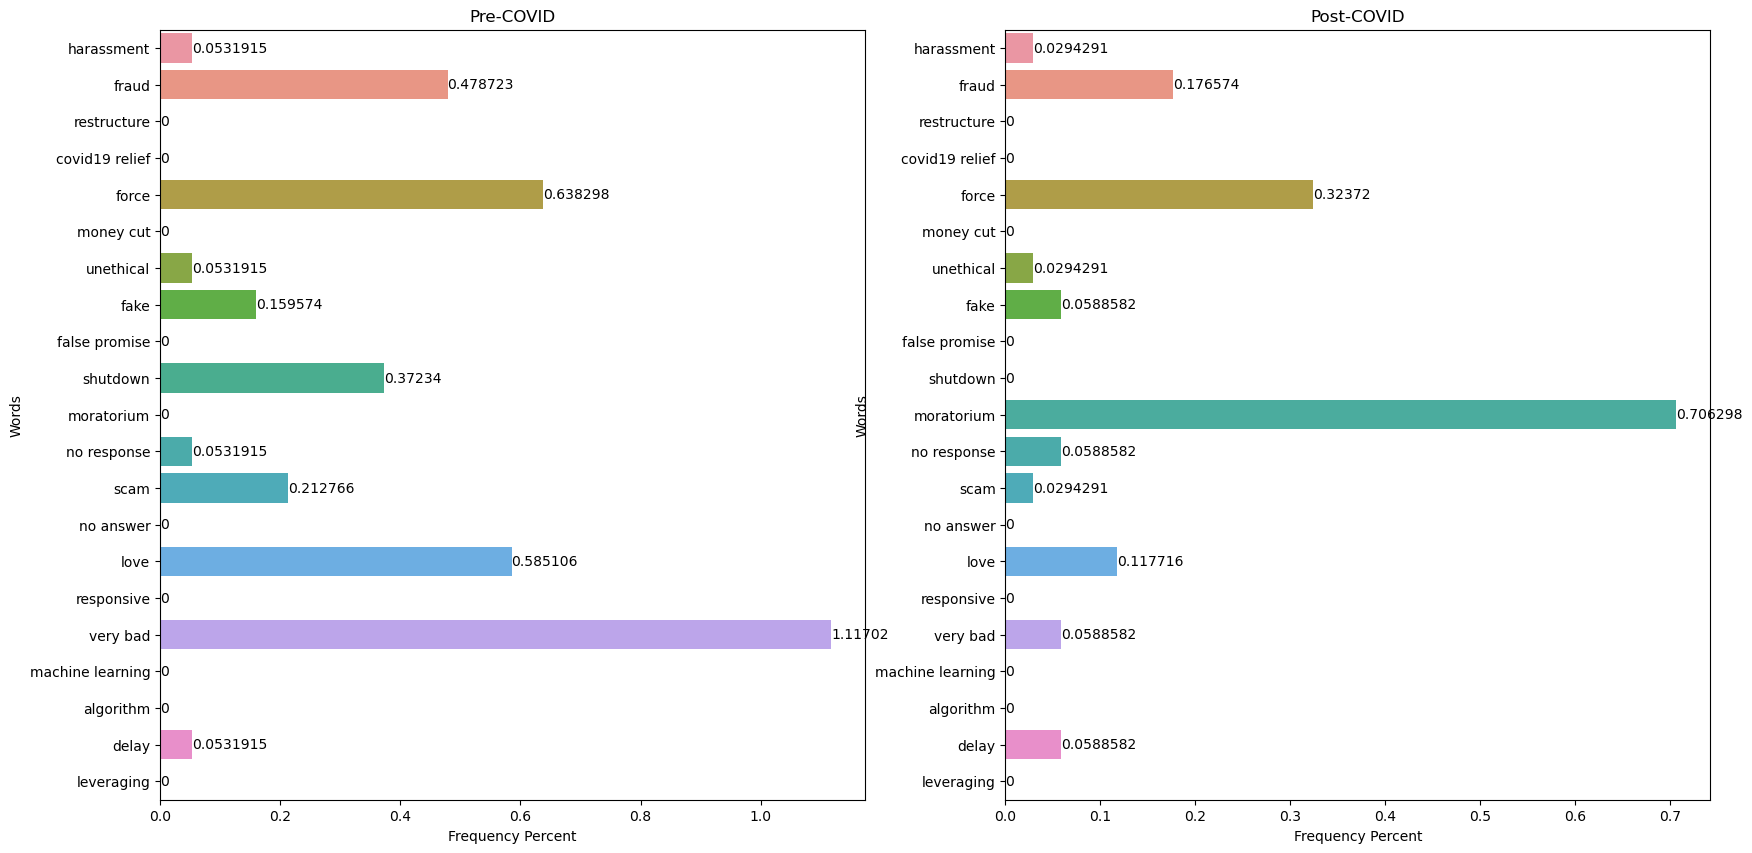

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='true_percent', y='words', data=pre_result, orient='h', ax=axes[0])
axes[0].set(xlabel='Frequency Percent', ylabel='Words', title='Pre-COVID')
for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.barplot(x='true_percent', y='words', data=post_result, orient='h', ax=axes[1])
axes[1].set(xlabel='Frequency Percent', ylabel='Words', title='Post-COVID')
for i in axes[1].containers:
    axes[1].bar_label(i,)

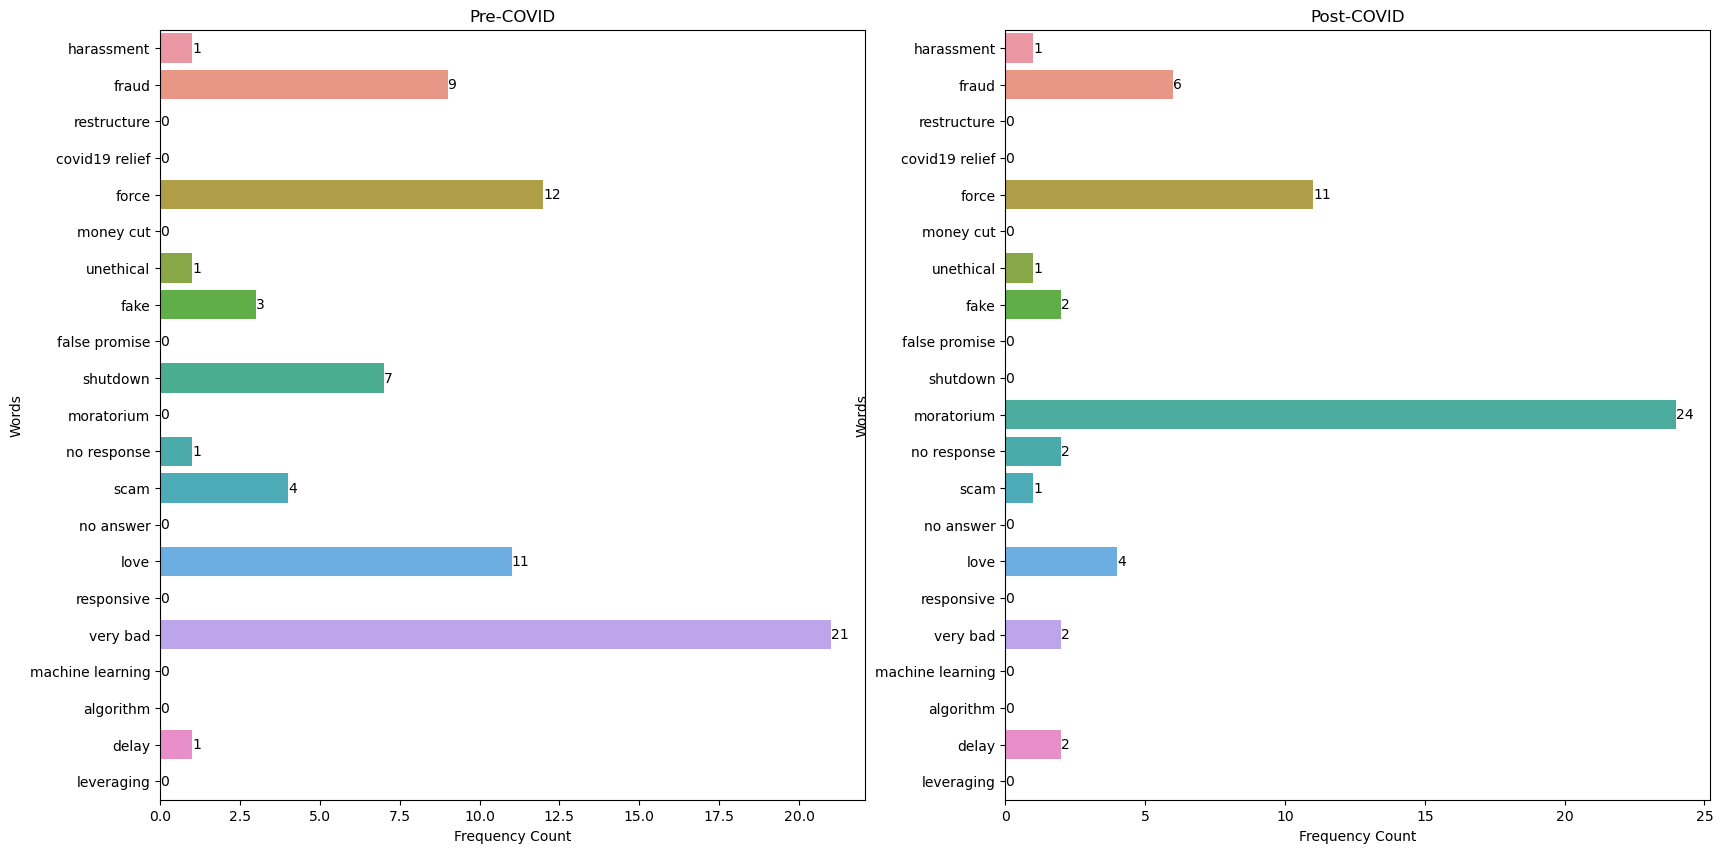

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='true_cnt', y='words', data=pre_result, orient='h', ax=axes[0])
axes[0].set(xlabel='Frequency Count', ylabel='Words', title='Pre-COVID')
for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.barplot(x='true_cnt', y='words', data=post_result, orient='h', ax=axes[1])
axes[1].set(xlabel='Frequency Count', ylabel='Words', title='Post-COVID')
for i in axes[1].containers:
    axes[1].bar_label(i,)